In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("Mall_Customers.csv")
data.shape                               #(200, 5)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


查看缺失值

In [4]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


数据可视化

E:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

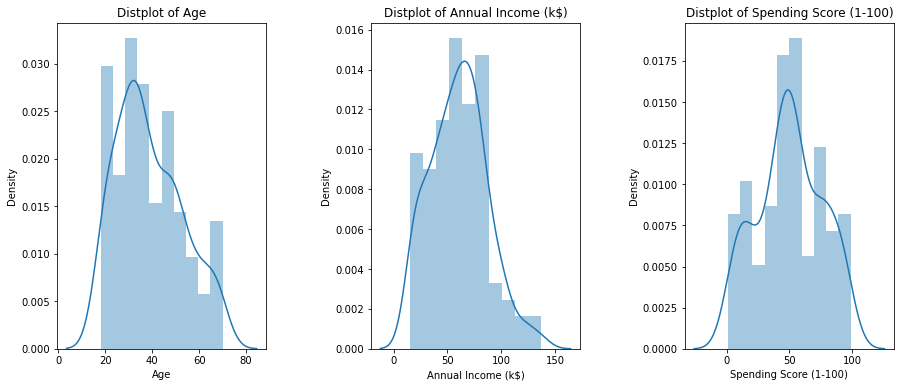

In [7]:
plt.figure(1,figsize=(15,6))
n = 0 
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace =0.5,wspace = 0.5 )
    sns.distplot(data[x],bins =10)
    plt.title('Distplot of {}'.format(x))
plt.show()

会员年龄在20-60左右，大部分年龄在20-40岁；年收入20k$-120k$左右，收入50k左右占比较大

查看会员中性别频数

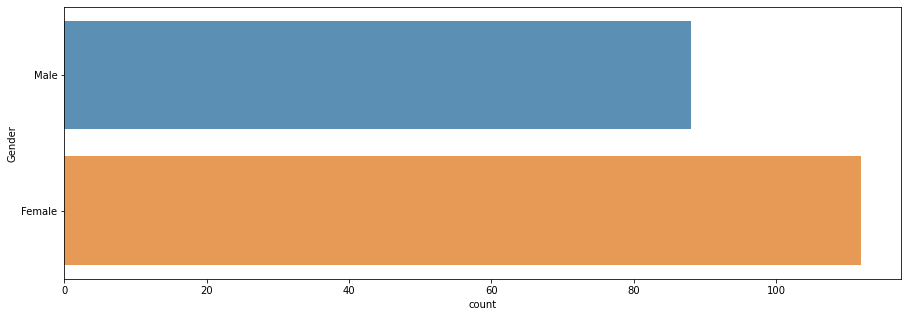

In [8]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = data,alpha = 4/5)              #alpha调节透明度
plt.show()

女性总数大于男性

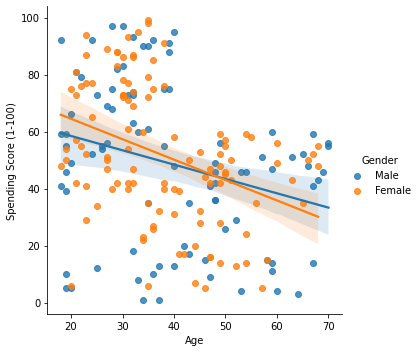

In [9]:
sns.lmplot(x="Age",y='Spending Score (1-100)',hue = 'Gender',data=data)

随着年龄增高，购买分数下降，女性降低的速度高于男性

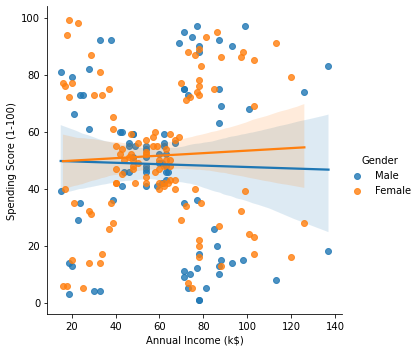

In [10]:
sns.lmplot(x="Annual Income (k$)",y='Spending Score (1-100)',hue = 'Gender',data=data)

随着收入的增加，男性和女性的消费分数基本不变（男性略微下降，女性略微上升）

In [11]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import Normalizer,StandardScaler,MaxAbsScaler

尝试分组

In [12]:
data1 = data.loc[:,['Age','Annual Income (k$)','Spending Score (1-100)']]
cluster = KMeans(n_clusters=4)
cluster.fit(data1)

E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

利用“肘”方法找出最佳聚类个数 改善效果下降幅度最大的位置对应的值

E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

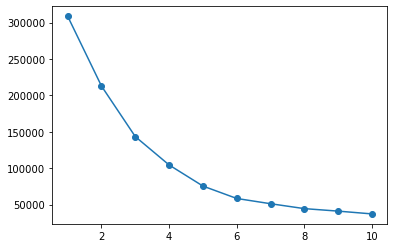

In [13]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data1)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11),inertia,'o-')

E:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='col1', ylabel='col2'>

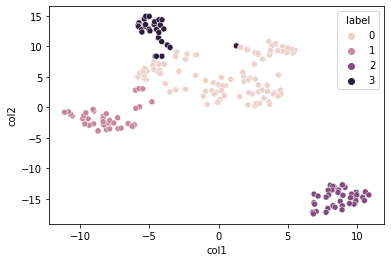

In [14]:
from sklearn import manifold 
tsne = manifold.TSNE() 
tsne_data = tsne.fit_transform(data1)
tsne_df = pd.DataFrame(tsne_data,columns=['col1','col2'])
tsne_df.loc[:,'label']=cluster.predict(data1)
sns.scatterplot(x = 'col1',y='col2',hue='label',data=tsne_df)

分析结果

In [15]:
from sklearn import metrics
score = metrics.silhouette_score(data1,tsne_df.loc[:,'label'])
print('聚类个数为4时，轮廓函数:' , score)

聚类个数为4时，轮廓函数: 0.40546302077733304


<AxesSubplot:>

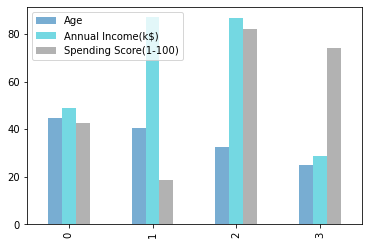

In [27]:
cluster_centers_=cluster.cluster_centers_
result2 = pd.DataFrame(data=cluster_centers_,
          columns = ['Age','Annual Income(k$)','Spending Score(1-100)']).reset_index(drop= True)
result2.plot(kind='bar',color=['C0','C9','C7'],clip_on=False,alpha = 3/5)

In [25]:
data['cluster'] = cluster.labels_
data['cluster'].value_counts(1)

0    0.475
2    0.195
1    0.190
3    0.140
Name: cluster, dtype: float64

1类和0类客户群体占比达到67%，2类客户群体占比较少

1组：平均年龄40-50之间，收入40-60k$之间，消费分40左右，会员人数占总会员47.5%（理性消费人群：平均年纪偏高，消费能力居中，会员群体占比较大）

0组：平均年龄30左右，收入≥80k$，消费分80左右，会员人数占总会员19.5% （重要价值用户：中青年，消费能力高且销售分数高，忠实消费者）

3组：平均年龄40左右，收入≥80k$，消费分20以下，会员人数占总会员19% （谨慎消费人群：消费能力高但消费分低）

2组：平均年龄20-30左右，收入30k$之间，消费分70左右，会员人数占总会员14% （冲动消费用户：消费能力低但在商场消费分数高）